# Projeto - Emissões de gases de efeito estufa no Brasil



* Objetivo do Projeto: Responder a pergunta, Qual Atividade brasileira Econômica causa mais impacto no efeito estufa, seja ele a curto prazo ou a longo prazo, isto é, somando os danos causados por cada setor desde 1970 até 2018?



 fonte: https://basedosdados.org

In [12]:
## Para instalar a base de dados: !pip install basedosdados 



import basedosdados as bd
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:

# Para carregar o dado direto no pandas
dados = bd.read_table(dataset_id='br_seeg_emissoes',
table_id='brasil',
billing_project_id="p2-cdados")

Downloading: 100%|██████████| 454850/454850 [00:47<00:00, 9504.39rows/s]


In [14]:
dados.head()

,ano,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,tipo_emissao,gas,atividade_economica,produto,emissao
0,1970,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),None,None,230462.17
1,1971,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),None,None,226016.30
2,1972,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),None,None,220101.20
3,1973,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),None,None,214195.56
4,1974,Agropecuária,Cultivo do Arroz,Diretas,Outros,Vegetal,Arroz,Emissão,CH4 (t),None,None,186862.84


In [15]:
#Renomeando Variáveis
dados = dados.rename(columns={'nivel_1': 'setor'})
dados = dados.rename(columns={'nivel_2': 'processo_emissor'})
dados = dados.rename(columns={'nivel_3': 'forma_emissao'})
dados = dados.rename(columns={'nivel_4': 'processo_especifico'})
dados = dados.rename(columns={'nivel_5': 'tipo_atividade'})
dados = dados.rename(columns={'nivel_6': 'atividade_especifica'})

In [6]:
#Eliminando dados desnecessários


In [7]:
dados.setor.value_counts(normalize=True).to_frame().round(3)*100 

,setor
Energia,59.0
Mudança de Uso da Terra e Floresta,28.4
Agropecuária,7.2
Processos Industriais,4.1
Resíduos,1.3


<AxesSubplot:title={'center':'emissao'}, xlabel='setor'>

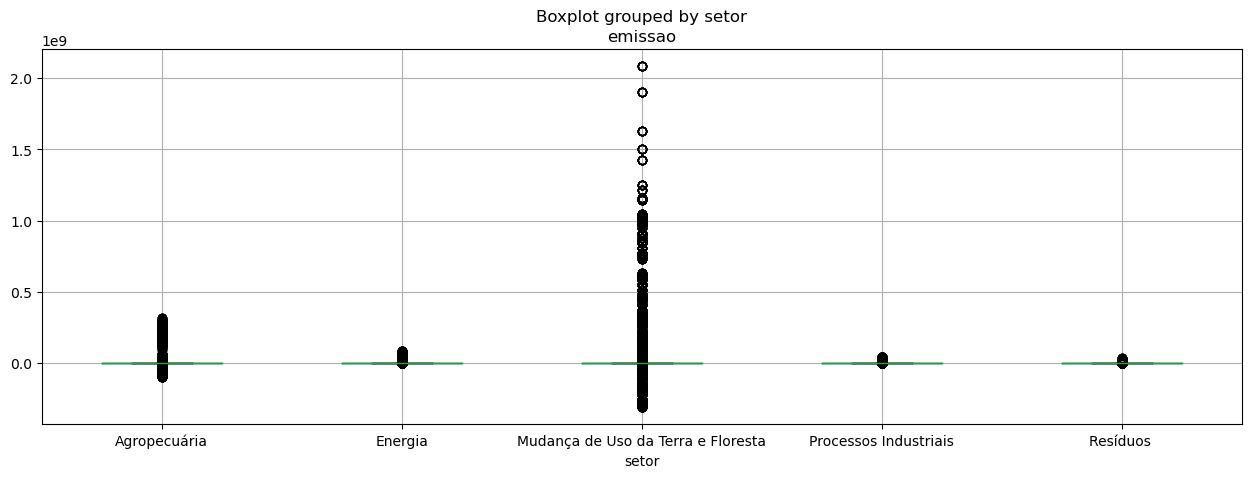

In [17]:
dados.boxplot('emissao',by = 'setor',figsize=(15,5))